In [1]:
#数据增强
from keras.preprocessing.image import ImageDataGenerator
path = 'original_data'#图片加强的文件路径
dst_path = 'gen_data'
datagen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.02,horizontal_flip=True,
                             vertical_flip=True)
gen = datagen.flow_from_directory(path,target_size=(224,224),
                                 batch_size=2, save_to_dir=dst_path,
                                 save_prefix='gen',save_format='jpg')
for i in range(100):
    gen.next()

Found 10 images belonging to 1 classes.


In [4]:
#load the image
from keras.preprocessing.image import load_img, img_to_array

img_path = '1.jpg'
img = load_img(img_path,target_size=(224,224))
type(img)

PIL.Image.Image

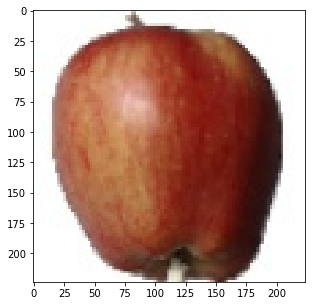

In [5]:
#visualize the image
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
plt.imshow(img)

In [8]:
img = img_to_array(img)
type(img)
print(img.shape)

(224, 224, 3)


In [10]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_vgg = VGG16(weights='imagenet',include_top=False)
X = np.expand_dims(img,axis=0)
X = preprocess_input(X)
print(X.shape)

(1, 224, 224, 3)


In [11]:
#特征提取
features = model_vgg.predict(X)
print(features.shape)

(1, 7, 7, 512)


In [12]:
#flatten
features = features.reshape(1,7*7*512)
print(features.shape)

(1, 25088)


In [22]:
#list all the names of the data
import os
folder = 'train_data'
dirs = os.listdir(folder)
#print(dirs)
#名称合并
img_path = []
for i in dirs:
    if os.path.splitext(i)[1] == '.jpg':
        img_path.append(i)
img_path = [folder + "//" + i for i in img_path]
print(img_path)

['train_data//10.jpg', 'train_data//11.jpg', 'train_data//13.jpg', 'train_data//14.jpg', 'train_data//15.jpg', 'train_data//16.jpg', 'train_data//17.jpg', 'train_data//18.jpg', 'train_data//19.jpg', 'train_data//20.jpg', 'train_data//21.jpg', 'train_data//22.jpg', 'train_data//23.jpg', 'train_data//24.jpg', 'train_data//25.jpg', 'train_data//36_100.jpg', 'train_data//38_100.jpg', 'train_data//3_100.jpg', 'train_data//4-0.jpg', 'train_data//4-1.jpg', 'train_data//4-2.jpg', 'train_data//4-3.jpg', 'train_data//4-4.jpg', 'train_data//4-5.jpg', 'train_data//4-6.jpg', 'train_data//4-7.jpg', 'train_data//4-8.jpg', 'train_data//4-9.jpg', 'train_data//8.jpg', 'train_data//9.jpg', 'train_data//gen_0_100234.jpg', 'train_data//gen_0_2419568.jpg', 'train_data//gen_0_3276820.jpg', 'train_data//gen_0_3309590.jpg', 'train_data//gen_0_334889.jpg', 'train_data//gen_0_3554009.jpg', 'train_data//gen_0_3835423.jpg', 'train_data//gen_0_410363.jpg', 'train_data//gen_0_4213939.jpg', 'train_data//gen_0_6164392

In [23]:
#define a method to extract the features
def modelProcess(img_path,model):
    img = load_img(img_path,target_size = (224,224))
    img = img_to_array(img)
    X = np.expand_dims(img,axis=0)
    X = preprocess_input(X)
    X_VGG = model.predict(X)
    X_VGG = X_VGG.reshape(1,7*7*512)
    return X_VGG

In [24]:
#图像批量处理
features_train = np.zeros([len(img_path),7*7*512])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features_train[i] = feature_i

preprocessed: train_data//10.jpg
preprocessed: train_data//11.jpg
preprocessed: train_data//13.jpg
preprocessed: train_data//14.jpg
preprocessed: train_data//15.jpg
preprocessed: train_data//16.jpg
preprocessed: train_data//17.jpg
preprocessed: train_data//18.jpg
preprocessed: train_data//19.jpg
preprocessed: train_data//20.jpg
preprocessed: train_data//21.jpg
preprocessed: train_data//22.jpg
preprocessed: train_data//23.jpg
preprocessed: train_data//24.jpg
preprocessed: train_data//25.jpg
preprocessed: train_data//36_100.jpg
preprocessed: train_data//38_100.jpg
preprocessed: train_data//3_100.jpg
preprocessed: train_data//4-0.jpg
preprocessed: train_data//4-1.jpg
preprocessed: train_data//4-2.jpg
preprocessed: train_data//4-3.jpg
preprocessed: train_data//4-4.jpg
preprocessed: train_data//4-5.jpg
preprocessed: train_data//4-6.jpg
preprocessed: train_data//4-7.jpg
preprocessed: train_data//4-8.jpg
preprocessed: train_data//4-9.jpg
preprocessed: train_data//8.jpg
preprocessed: train_dat

preprocessed: train_data//gen_8_2498486.jpg
preprocessed: train_data//gen_8_2502755.jpg
preprocessed: train_data//gen_8_253547.jpg
preprocessed: train_data//gen_8_2632602.jpg
preprocessed: train_data//gen_8_2896271.jpg
preprocessed: train_data//gen_8_4065453.jpg
preprocessed: train_data//gen_8_4972878.jpg
preprocessed: train_data//gen_8_5398054.jpg
preprocessed: train_data//gen_8_6889458.jpg
preprocessed: train_data//gen_8_7357777.jpg
preprocessed: train_data//gen_8_7945773.jpg
preprocessed: train_data//gen_8_8753026.jpg
preprocessed: train_data//gen_8_9370023.jpg
preprocessed: train_data//gen_8_9671410.jpg
preprocessed: train_data//gen_8_9861065.jpg
preprocessed: train_data//gen_8_9999916.jpg
preprocessed: train_data//gen_9_154394.jpg
preprocessed: train_data//gen_9_2078317.jpg
preprocessed: train_data//gen_9_2534465.jpg
preprocessed: train_data//gen_9_4056318.jpg
preprocessed: train_data//gen_9_4133292.jpg
preprocessed: train_data//gen_9_4955335.jpg
preprocessed: train_data//gen_9_50

In [25]:
print(features_train.shape)

(230, 25088)


In [26]:
#define X;30>>10普通苹果》》+200普通苹果
X = features_train

In [27]:
#set up a kmeans- un-supervised model
from sklearn.cluster import KMeans
cnn_kmeans = KMeans(n_clusters=2,max_iter=2000)
cnn_kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
#make prediction
y_predict_kmeans = cnn_kmeans.predict(X)
print(y_predict_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1
 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0
 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0
 1 1 0 0 1 1 1 0]


In [29]:
from collections import Counter
print(Counter(y_predict_kmeans))#预测结果统计

Counter({1: 117, 0: 113})


In [30]:
normal_apple_id = 1

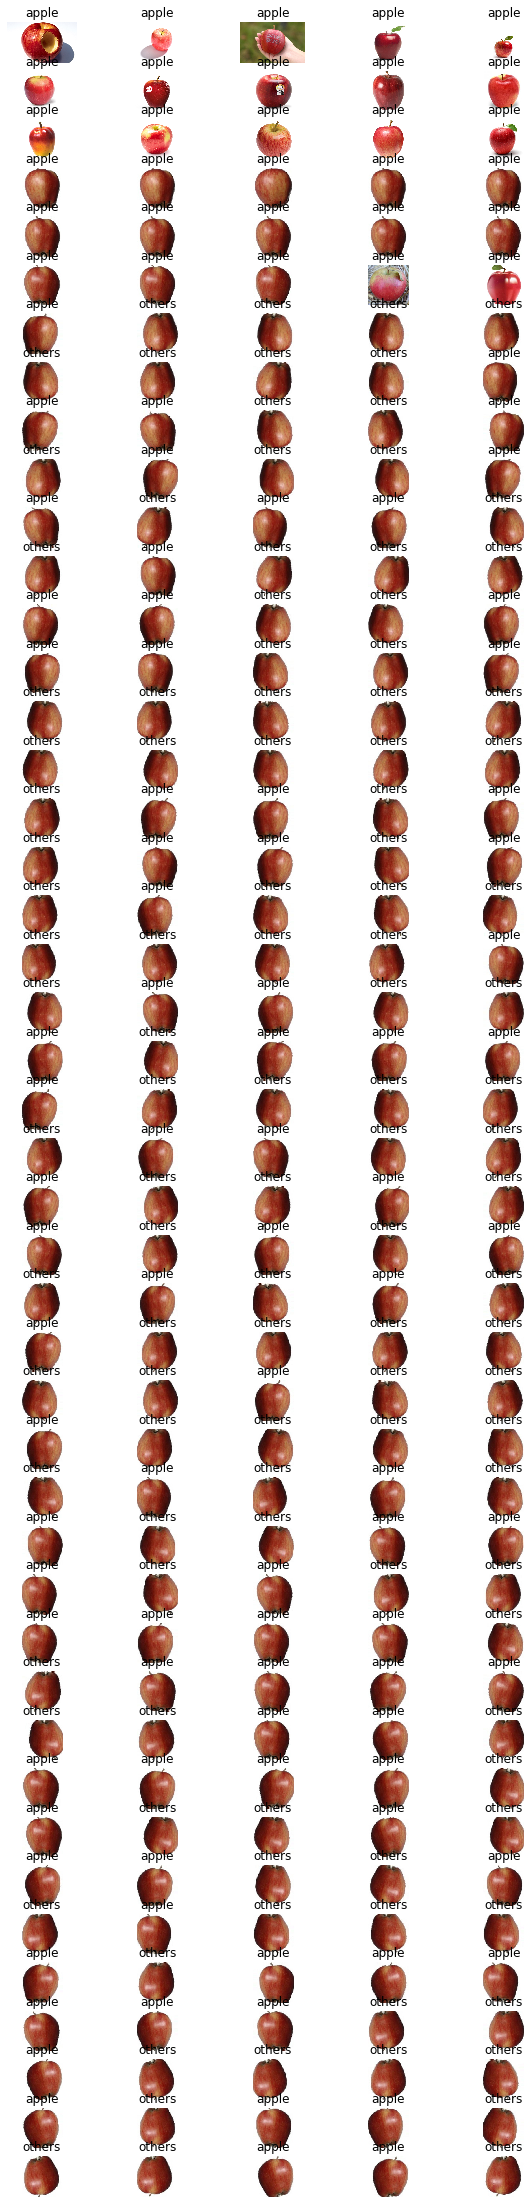

In [31]:
#visualize the result
fig2 = plt.figure(figsize=(10,40))
for i in range(45):
    for j in range(5):
        img = load_img(img_path[i*5+j])#read the image
        plt.subplot(45,5,i*5+j+1)
        plt.title('apple' if y_predict_kmeans[i*5+j]==normal_apple_id else 'others')
        plt.imshow(img),plt.axis('off')

In [35]:
#list all the names of the data
import os
folder_test = 'test_data'
dirs_test = os.listdir(folder_test)
#print(dirs)
#名称合并
img_path_test = []
for i in dirs_test:
    if os.path.splitext(i)[1] == '.jpg':
        img_path_test.append(i)
img_path_test = [folder_test + "//" + i for i in img_path_test]
print(len(img_path_test))

12


In [36]:
features_test = np.zeros([len(img_path_test),7*7*512])
for i in range(len(img_path_test)):
    feature_i = modelProcess(img_path_test[i],model_vgg)
    print('preprocessed:',img_path_test[i])
    features_test[i] = feature_i
X_test = features_test

preprocessed: test_data//1.jpg
preprocessed: test_data//3.jpg
preprocessed: test_data//xx_0_1133520.jpg
preprocessed: test_data//xx_12_5963907.jpg
preprocessed: test_data//xx_14_6969294.jpg
preprocessed: test_data//xx_1_586816.jpg
preprocessed: test_data//xx_2_1588073.jpg
preprocessed: test_data//xx_3_3378731.jpg
preprocessed: test_data//xx_5_4481562.jpg
preprocessed: test_data//xx_7_4698934.jpg
preprocessed: test_data//xx_8_5910781.jpg
preprocessed: test_data//xx_9_3279522.jpg


In [38]:
y_predict_kmeans_test = cnn_kmeans.predict(X_test)
print(y_predict_kmeans_test)

[0 0 0 1 1 1 1 1 1 1 1 1]


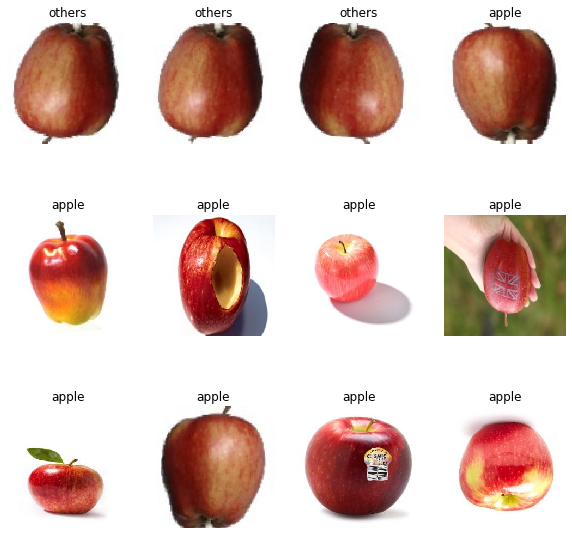

In [39]:
#visualize the result
fig3 = plt.figure(figsize=(10,10))
for i in range(3):
    for j in range(4):
        img = load_img(img_path_test[i*4+j])#read the image
        plt.subplot(3,4,i*4+j+1)
        plt.title('apple' if y_predict_kmeans_test[i*4+j]==normal_apple_id else 'others')
        plt.imshow(img),plt.axis('off')

In [41]:
#meanshift
from sklearn.cluster import MeanShift, estimate_bandwidth
#obtain the bandwidth
bw = estimate_bandwidth(X,n_samples=140)
print(bw)
#set up meanshift model
cnn_ms = MeanShift(bandwidth=bw)
cnn_ms.fit(X)

1236.646659852726


MeanShift(bandwidth=1236.646659852726, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [42]:
#make prediction
y_predict_ms = cnn_ms.predict(X)
print(y_predict_ms)

[10  6 11  0  7  0  4  8  0  0  3  0  9  2  5  0  0  0  0  0  0  0  0  0
  0  0  0  0  1 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [43]:
print(Counter(y_predict_ms))#预测结果统计

Counter({0: 218, 10: 1, 6: 1, 11: 1, 7: 1, 4: 1, 8: 1, 3: 1, 9: 1, 2: 1, 5: 1, 1: 1, 12: 1})


In [44]:
normal_apple_id = 0

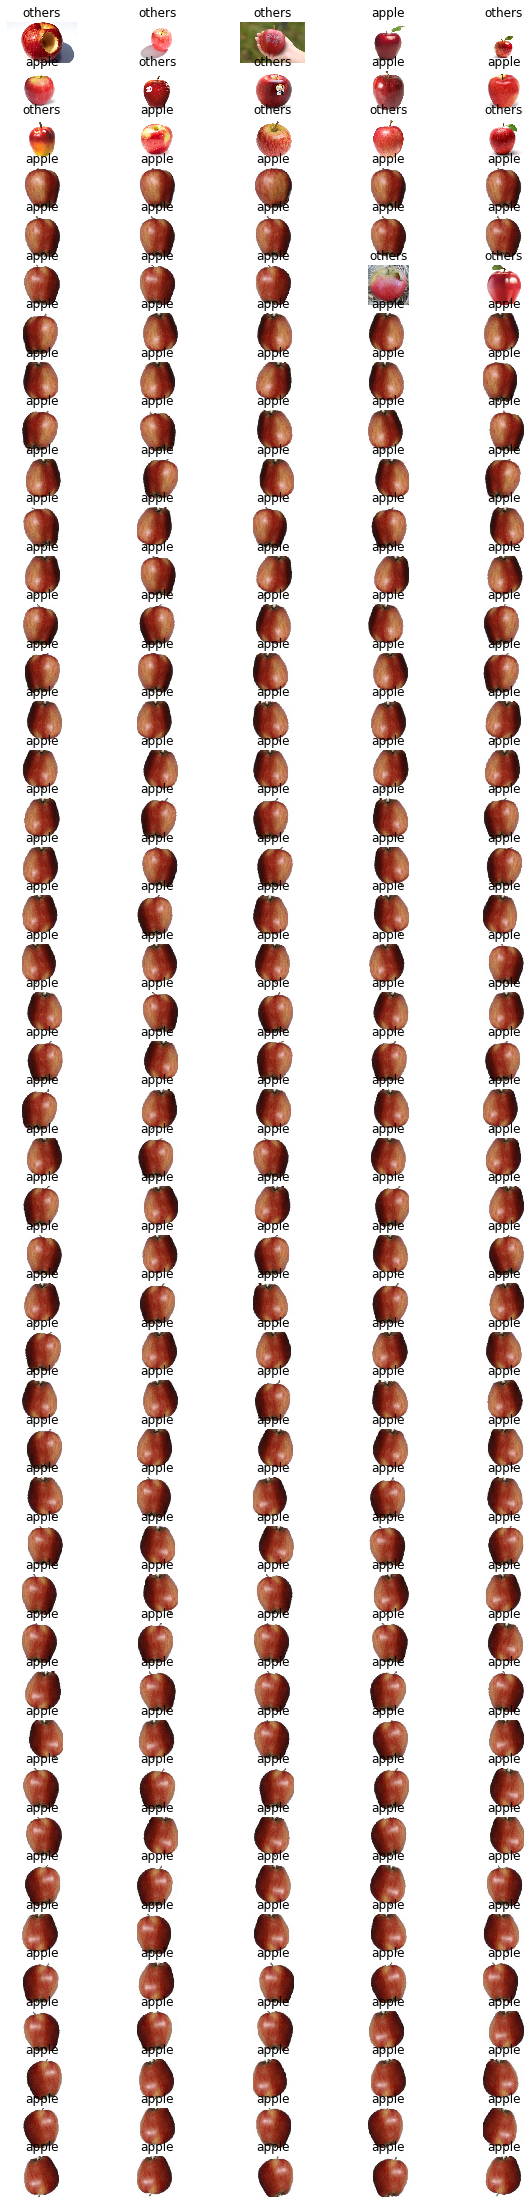

In [45]:
fig4 = plt.figure(figsize=(10,40))
for i in range(45):
    for j in range(5):
        img = load_img(img_path[i*5+j])#read the image
        plt.subplot(45,5,i*5+j+1)
        plt.title('apple' if y_predict_ms[i*5+j]==normal_apple_id else 'others')
        plt.imshow(img),plt.axis('off')

In [46]:
y_predict_ms_test = cnn_ms.predict(X_test)
print(y_predict_ms_test)

[ 0  0  0  0  3 10  0  0  7  0  8  0]


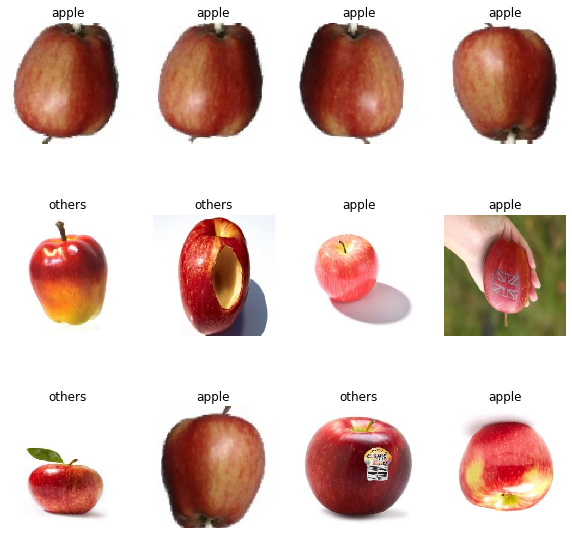

In [48]:
#visualize the result
fig5 = plt.figure(figsize=(10,10))
for i in range(3):
    for j in range(4):
        img = load_img(img_path_test[i*4+j])#read the image
        plt.subplot(3,4,i*4+j+1)
        plt.title('apple' if y_predict_ms_test[i*4+j]==normal_apple_id else 'others')
        plt.imshow(img),plt.axis('off')

In [49]:
#PCA降维
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
X_norm = stds.fit_transform(X)
#PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
X_pca = pca.fit_transform(X_norm)

In [50]:
#calculate the variance ratio of each components
var_ratio = pca.explained_variance_ratio_
print(np.sum(var_ratio))

0.9838306367782652


In [52]:
print(X_pca.shape,X.shape)

(230, 200) (230, 25088)


In [54]:
#meanshift
from sklearn.cluster import MeanShift, estimate_bandwidth
#obtain the bandwidth
bw = estimate_bandwidth(X_pca,n_samples=140)
print(bw)
#set up meanshift model
cnn_pca_ms = MeanShift(bandwidth=bw)
cnn_pca_ms.fit(X_pca)

149.448502690514


MeanShift(bandwidth=149.448502690514, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [55]:
#make prediction
y_predict_pca_ms = cnn_pca_ms.predict(X_pca)
print(y_predict_pca_ms)

[ 6 12  2  9 14  0  8  3 15 13 11  7  5 16 10  0  0 19  0  0  0  0  0  0
  0  0  0  0  1  4  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [57]:
print(Counter(y_predict_pca_ms))#预测结果统计

Counter({0: 208, 6: 1, 12: 1, 2: 1, 9: 1, 14: 1, 8: 1, 3: 1, 15: 1, 13: 1, 11: 1, 7: 1, 5: 1, 16: 1, 10: 1, 19: 1, 1: 1, 4: 1, 17: 1, 18: 1, 20: 1, 21: 1, 22: 1})


In [58]:
normal_apple_id = 0

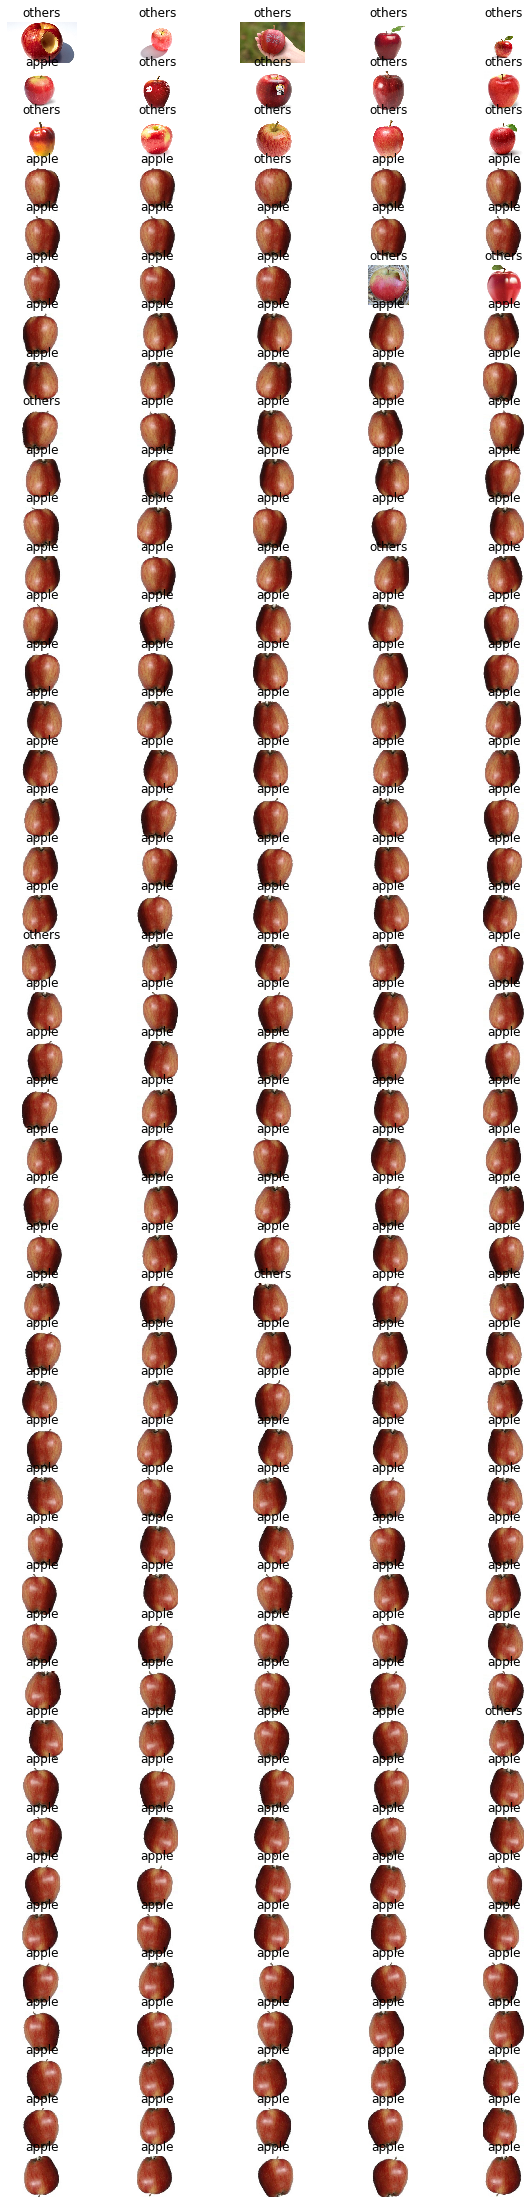

In [59]:
fig6 = plt.figure(figsize=(10,40))
for i in range(45):
    for j in range(5):
        img = load_img(img_path[i*5+j])#read the image
        plt.subplot(45,5,i*5+j+1)
        plt.title('apple' if y_predict_pca_ms[i*5+j]==normal_apple_id else 'others')
        plt.imshow(img),plt.axis('off')

In [60]:
X_norm_test = stds.transform(X_test)
X_pca_test = pca.transform(X_norm_test)

In [61]:
y_predict_pca_ms_test = cnn_pca_ms.predict(X_pca_test)
print(y_predict_pca_ms_test)

[ 0  0  0  0 11  6  7 18 14  0  3  0]


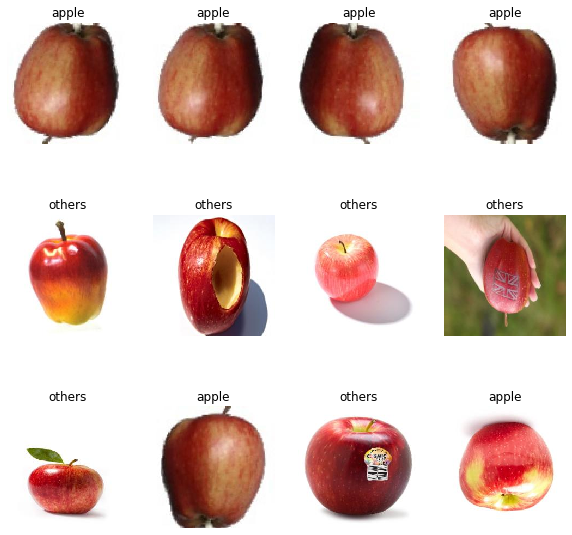

In [62]:
#visualize the result
fig7 = plt.figure(figsize=(10,10))
for i in range(3):
    for j in range(4):
        img = load_img(img_path_test[i*4+j])#read the image
        plt.subplot(3,4,i*4+j+1)
        plt.title('apple' if y_predict_pca_ms_test[i*4+j]==normal_apple_id else 'others')
        plt.imshow(img),plt.axis('off')